In [ ]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

PATH = '/content/drive/MyDrive/Colab Notebooks/Robotica/dados/'


In [ ]:
def calc_hierarchy(data,n_cluster_max,n_min_pontos):
    # Generate sample data
    X = data.to_numpy()

    # Perform linkage
    Z = linkage(X, method='single')


    # Cut the dendrogram to obtain clusters
    clusters = cut_tree(Z, n_clusters=np.linspace(1,n_cluster_max,n_cluster_max))

    for i in range(clusters.shape[1]):
        _, counts = np.unique(clusters[:,i], return_counts=True)
        if np.min(counts)<n_min_pontos:
            cluster = clusters[:,i-1]
            break

    return cluster



def calc_centroid(data):
    label, counts = np.unique(data['weight'], return_counts=True)
    centroids = []

    for classe in label:
        aux = data[data['weight']==classe]
        x_mean = sum(aux.iloc[:,0].to_numpy())/len(aux)
        y_mean = sum(aux.iloc[:,1].to_numpy())/len(aux)
        centroids.append((x_mean,y_mean))

    return centroids    

In [ ]:
data = pd.read_csv(PATH + 'mapa_9_07_17_menor05.csv', header = 0, delimiter=',')

In [ ]:
data[data.weight==0].shape

(721, 3)

In [ ]:
data_ocupado = data[data['weight']==0] 
data_ocupado.iloc[:,0:2].to_numpy()

array([[  0.,  51.],
       [  0.,  52.],
       [  1.,  49.],
       ...,
       [112.,  63.],
       [112.,  64.],
       [113.,  41.]])

In [ ]:
cluster = calc_hierarchy(data_ocupado.iloc[:,0:2],12,10)

In [ ]:
#plt.scatter(data_ocupado["x grid"], data_ocupado["y grid"], s=1, c = data_ocupado["weight"])

<ipython-input-28-6122da4fa1f8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ocupado['weight'] = test.values


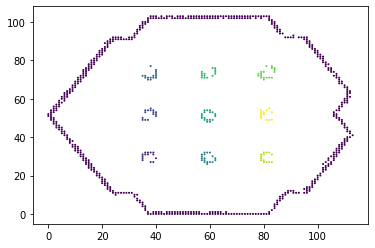

In [ ]:
test = pd.DataFrame(cluster)


data_ocupado['weight'] = test.values

data_ocupado

plt.scatter(data_ocupado["x grid"], data_ocupado["y grid"], s=1, c = data_ocupado["weight"])

In [ ]:
calc_centroid(data_ocupado)

[(56.15807560137457, 53.08247422680412),
 (37.07142857142857, 30.142857142857142),
 (37.666666666666664, 52.13333333333333),
 (38.2, 72.13333333333334),
 (58.94444444444444, 29.055555555555557),
 (59.22222222222222, 51.05555555555556),
 (59.357142857142854, 73.07142857142857),
 (80.94444444444444, 73.22222222222223),
 (80.57142857142857, 29.428571428571427),
 (80.53846153846153, 51.84615384615385)]